In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful.eda import basic_info
%matplotlib inline

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)', nan],
      dtype=object)

In [4]:
#drop rows where the target var is nan
y2015_ = y2015[pd.notnull(y2015['loan_status'])]; y2015_['loan_status'].unique()


array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [5]:
#make a column of encoded target variables 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = le.fit(y2015_['loan_status'])

y2015_['target_var'] = le.transform(y2015_['loan_status'])

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


basic info for this dataframe...


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target_var
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68009401,NaN,credit_card,Credit card refinancing,297xx,SC,33.18,0.0,Jun-1991,0.0,33.0,2.0,11.0,2.0,19108.0,29.6%,19.0,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-2017,379.39,Jan-2017,Jan-2017,0.0,33.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,6.0,2848.0,263953.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,76.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,11.0,9.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0,1
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,tech,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68354783,NaN,credit_card,Credit card refinancing,299xx,SC,22.44,0.0,Jun-1996,0.0,NaN,NaN,7.0,0.0,7722.0,59.4%,9.0,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-2017,298.58,Jan-2017,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,2.0,7912.0,4778.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,NaN,0.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0,1
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68466916,NaN,debt_consolidation,Debt consolidation,226xx,VA,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3%,19.0,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-2016,20807.39,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,3
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68466961,NaN,debt_consolidati

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type', 'verification_status_joint'],
      dtype='object')
The number of non-numerical columns is 26
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_m

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


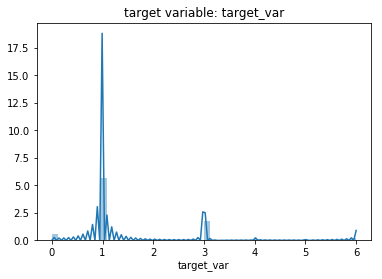

In [6]:
basic_info.data_info(y2015_,'target_var')

In [7]:
numeric_columns = y2015_.select_dtypes(['int64', 'float64']).columns
numeric_df = y2015_.loc[:, [col for col in numeric_columns]]; numeric_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target_var
0,72868139.0,16000.0,16000.0,16000.0,379.39,48000.0,33.18,0.0,0.0,33.0,...,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0,1
1,73244544.0,9600.0,9600.0,9600.0,298.58,60000.0,22.44,0.0,0.0,NaN,...,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0,1
2,73356753.0,25000.0,25000.0,25000.0,777.55,109000.0,26.02,0.0,1.0,NaN,...,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,3
3,73356799.0,28000.0,28000.0,28000.0,858.05,92000.0,21.60,0.0,0.0,42.0,...,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,1
4,73384866.0,8650.0,8650.0,8650.0,320.99,55000.0,25.49,0.0,4.0,NaN,...,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0,3


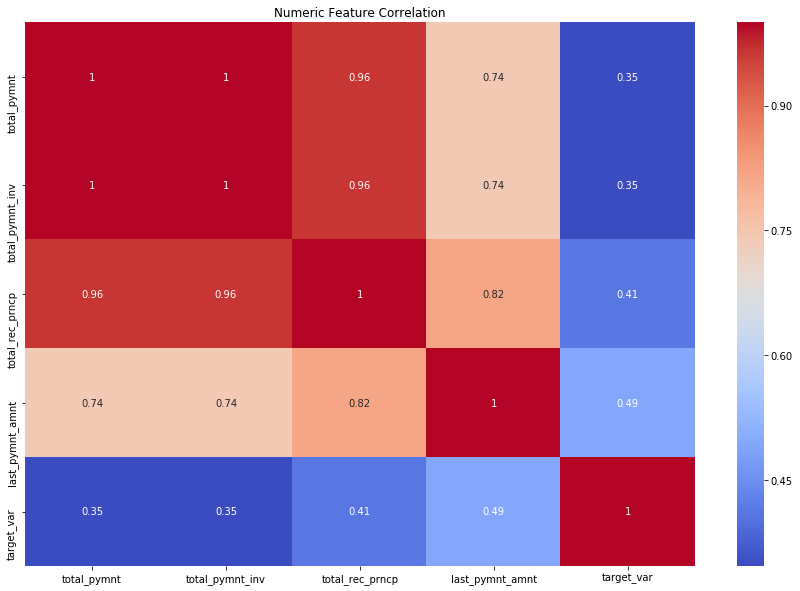

In [23]:
basic_info.numeric_feature_corr(numeric_df,target_variable='target_var',plot='heatmap',corr_cutoff=0.3)

#### BW elimination

In [73]:
X = numeric_df.loc[:,[x for x in numeric_df.columns if x != 'target_var']]
Y = numeric_df['target_var']

In [74]:
pd.DataFrame(X.isnull().sum().sort_values(ascending=True)).head(56)

,0
member_id,0
total_bc_limit,0
total_rev_hi_lim,0
acc_open_past_24mths,0
avg_cur_bal,0
chargeoff_within_12_mths,0
delinq_amnt,0
mo_sin_old_rev_tl_op,0
mo_sin_rcnt_rev_tl_op,0
mo_sin_rcnt_tl,0


In [75]:
X_ = X.loc[:,[x for x in numeric_df.columns if x in X.isnull().sum().sort_values(ascending=True).index[:56]]]


In [76]:
import statsmodels.api as sm

cols = list(X_.columns)
pmax = 1

while (len(cols)>0):
    p= []
    X_1 = X_[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['member_id', 'loan_amnt', 'funded_amnt_inv', 'installment', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'policy_code', 'total_rev_hi_lim', 'acc_open_past_24mths', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_bc_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']


In [94]:
non_numeric_df = y2015_.loc[:,[x for x in y2015_.columns if x in y2015_.select_dtypes(['object']).columns]]
non_numeric_df.head()

#pd.DataFrame(non_numeric_df.isnull().sum().sort_values(ascending=True))

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
0,68009401,60 months,14.85%,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,Not Verified,Dec-2015,...,297xx,SC,Jun-1991,29.6%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
1,68354783,36 months,7.49%,A,A4,tech,8 years,MORTGAGE,Not Verified,Dec-2015,...,299xx,SC,Jun-1996,59.4%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
2,68466916,36 months,7.49%,A,A4,Sales Manager,10+ years,MORTGAGE,Not Verified,Dec-2015,...,226xx,VA,Dec-2001,54.3%,w,Sep-2016,NaN,Jan-2017,INDIVIDUAL,NaN
3,68466961,36 months,6.49%,A,A2,Senior Manager,10+ years,MORTGAGE,Not Verified,Dec-2015,...,275xx,NC,May-1984,64.5%,w,Jan-2017,Jan-2017,Jan-2017,INDIVIDUAL,NaN
4,68495092,36 months,19.89%,E,E3,Program Coordinator,8 years,RENT,Verified,Dec-2015,...,462xx,IN,Mar-2005,46%,w,May-2016,NaN,Jun-2016,INDIVIDUAL,NaN


In [95]:
X_non_num = non_numeric_df.loc[:,[x for x in non_numeric_df.columns if x in non_numeric_df.isnull().sum().sort_values(ascending=True).index[:15]]]


In [96]:
X_non_num.head()

,id,int_rate,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,68009401,14.85%,C,C5,MORTGAGE,Not Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,297xx,SC,Jun-1991,w,INDIVIDUAL
1,68354783,7.49%,A,A4,MORTGAGE,Not Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,299xx,SC,Jun-1996,w,INDIVIDUAL
2,68466916,7.49%,A,A4,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,226xx,VA,Dec-2001,w,INDIVIDUAL
3,68466961,6.49%,A,A2,MORTGAGE,Not Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,275xx,NC,May-1984,w,INDIVIDUAL
4,68495092,19.89%,E,E3,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,462xx,IN,Mar-2005,w,INDIVIDUAL


In [97]:
X_non_num = X_non_num.drop(['id','int_rate','url','zip_code','earliest_cr_line'],axis=1)
X_non_num

,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,C,C5,MORTGAGE,Not Verified,Current,n,credit_card,SC,w,INDIVIDUAL
1,A,A4,MORTGAGE,Not Verified,Current,n,credit_card,SC,w,INDIVIDUAL
2,A,A4,MORTGAGE,Not Verified,Fully Paid,n,debt_consolidation,VA,w,INDIVIDUAL
3,A,A2,MORTGAGE,Not Verified,Current,n,debt_consolidation,NC,w,INDIVIDUAL
4,E,E3,RENT,Verified,Fully Paid,n,debt_consolidation,IN,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...
421090,B,B5,RENT,Verified,Current,n,debt_consolidation,CA,f,INDIVIDUAL
421091,B,B5,MORTGAGE,Verified,Current,n,home_improvement,NJ,f,INDIVIDUAL
421092,D,D2,RENT,Verified,Charged Off,n,debt_consolidation,TN,w,INDIVIDUAL
421093,E,E3,RENT,Source Verified,Charged Off,n,debt_consolidation,MA,w,INDIVIDUAL


In [106]:
X_dummies = pd.get_dummies(X_non_num[['grade','sub_grade','purpose','application_type']])



In [107]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = X_dummies
Y = Y

cross_val_score(rfc, X, Y, cv=10)

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

array([0.68229204, 0.68245827, 0.68243452, 0.68243452, 0.68252197,
       0.68230824, 0.68232444, 0.68173075, 0.6823331 , 0.68237306])

In [108]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = X_
Y = Y

cross_val_score(rfc, X, Y, cv=10)

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

array([0.95421624, 0.96703949, 0.96359621, 0.96143525, 0.96119687,
       0.96133935, 0.96126719, 0.96081598, 0.96060038, 0.95993445])